In [33]:
import pandas as pd
import numpy.random as rnd
from MCForecastTools import MCSimulation
import alpaca_trade_api as tradeapi
import os

from pathlib import Path

from dotenv import load_dotenv
load_dotenv('api.env')

True

In [34]:
WTIcsvpath = Path("../Niels/Resources/WTI_Nymex_Max-2023-2013.csv")
df_WTI = pd.read_csv(WTIcsvpath)
NGcsvpath = Path("../Niels/Resources/NG_Nymex_Max-2023-2013.csv")
df_NG = pd.read_csv(NGcsvpath)

In [35]:
# Create a dictionary of the two dataframes
to_merge_dict = {'ng': df_NG , 'wti': df_WTI}

In [36]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

In [42]:
merged_df = merged_df.rename(columns={"Close/Last":"close"})

In [43]:
ten_year_simulation = MCSimulation(
    portfolio_data=merged_df,
    weights=[0.50, 0.50],
    num_simulation=50,
    num_trading_days=252*10,
)

In [44]:
ten_year_simulation.portfolio_data.head()

ng                                                            wti  \
         Date  close    Volume   Open   High    Low daily_return        Date   
0  01/18/2023  3.311  108825.0  3.628  3.644  3.274          NaN  01/18/2023   
1  01/17/2023  3.586  129068.0  3.557  3.789  3.521     0.083056  01/17/2023   
2  01/13/2023  3.419   99940.0  3.677  3.760  3.384    -0.046570  01/13/2023   
3  01/12/2023  3.695  115151.0  3.694  3.946  3.607     0.080725  01/12/2023   
4  01/11/2023  3.671  120514.0  3.575  3.777  3.422    -0.006495  01/11/2023   

                                                      
   close    Volume   Open   High    Low daily_return  
0  79.48   73990.0  80.97  82.38  78.94          NaN  
1  80.18  284009.0  80.10  81.23  78.53     0.008807  
2  79.86  245935.0  78.32  80.11  77.97    -0.003991  
3  78.39  276160.0  77.70  79.16  77.10    -0.018407  
4  77.41  320030.0  74.78  77.84  74.31    -0.012502

In [49]:
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.123647,0.935998,1.040283,1.031781,0.914863,0.923574,1.041199,0.946485,1.087076,1.036884,...,1.037721,0.965493,0.928722,0.939395,0.941355,1.062434,0.965687,1.034566,1.082153,1.014350
2,1.014633,0.812319,0.933712,1.001510,1.043245,0.901902,1.086021,0.881184,1.041073,1.054865,...,1.004254,0.970421,0.988154,0.918080,0.909775,1.098112,1.100281,1.150946,1.052060,0.985182
3,1.009413,0.810184,1.039139,0.918449,1.044832,0.834757,1.087288,0.963834,1.010887,1.076246,...,1.121866,0.926497,0.932305,0.954446,0.942328,1.188811,1.131792,1.191665,0.979425,0.939791
4,0.879535,0.910843,1.104950,0.937380,1.041646,0.846658,1.008137,1.014671,1.003055,1.112477,...,1.101909,0.916993,0.872705,0.931555,0.981074,1.192523,1.202191,1.218703,1.002028,0.902038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.080967,0.000349,0.010170,0.004362,0.497178,0.004013,0.009329,0.000416,0.006854,0.001587,...,0.000022,0.005071,0.010257,0.003089,0.003270,0.004282,0.000219,0.002384,0.196609,0.040447
2517,0.077743,0.000345,0.010711,0.004264,0.500332,0.004079,0.008962,0.000394,0.007049,0.001573,...,0.000023,0.004920,0.010476,0.002743,0.003305,0.004081,0.000201,0.002505,0.169510,0.039712
2518,0.082392,0.000363,0.011645,0.004431,0.533145,0.004429,0.009139,0.000386,0.006791,0.001408,...,0.000025,0.004834,0.010781,0.002575,0.003377,0.004593,0.000196,0.002451,0.174539,0.036423
2519,0.080109,0.000343,0.011049,0.004505,0.507536,0.004548,0.008632,0.000387,0.006696,0.001285,...,0.000022,0.004535,0.010326,0.002399,0.003243,0.004738,0.000192,0.002511,0.171470,0.038830


<AxesSubplot: title={'center': '50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

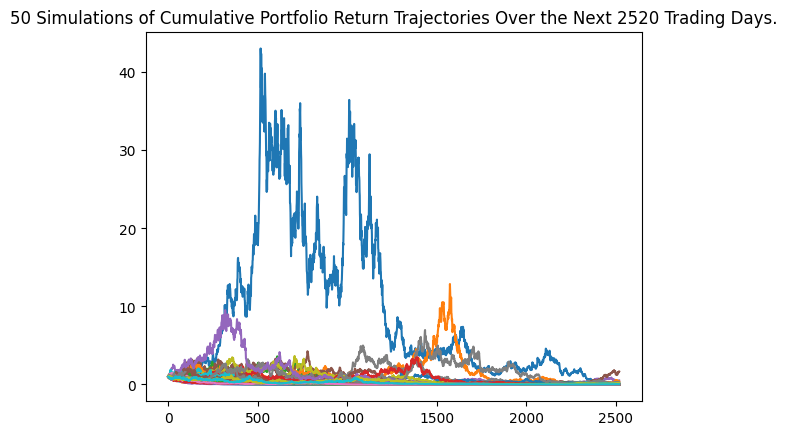

In [50]:
# overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot: title={'center': 'Distribution of Final Cumuluative Returns Across All 50 Simulations'}, ylabel='Frequency'>

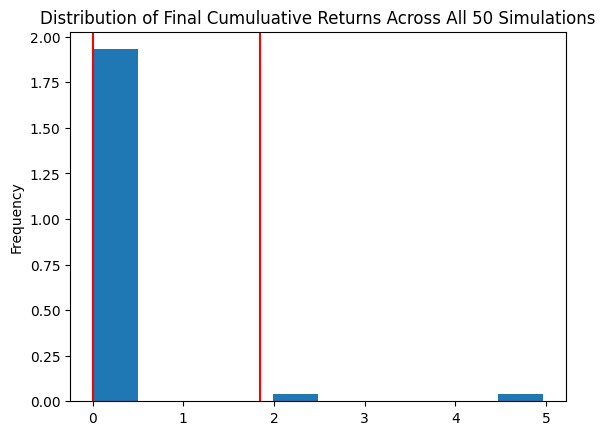

In [47]:
# Visualize distribution
ten_year_simulation.plot_distribution()

In [48]:
ten_year_simulation.summarize_cumulative_return()

/Users/vinnysgarzi/Documents/Columbia/Group5Project1/Vinny/MCForecastTools.py:186: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           50.000000
mean             0.172398
std              0.766027
min              0.000016
25%              0.000375
50%              0.002349
75%              0.048459
max              4.972885
95% CI Lower     0.000031
95% CI Upper     1.850824
Name: 2520, dtype: float64